In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time
import copy
import json

In [18]:

imageDictionary = {
    "image": [],
    "task1": [4, 5, 13, 14, 15],
    "grayImage": [],
    "faceDetectedImage": [],
    "realFaces": [],
    "realTarget": [],
    "targetDetection": []
}
cascadePath = "frontalface.xml"
cascade = cv.CascadeClassifier(cascadePath)

for i in range(16):
    image = cv.imread("./images/dart"+str(i)+".jpg")
    imageDictionary["image"].append(image)
    imageDictionary["grayImage"].append(cv.cvtColor(image, cv.COLOR_BGR2GRAY))


dummyImage = copy.deepcopy(imageDictionary["image"][5])

            




In [19]:
detectedFaceSquare = {
    
}
for i in range(len(imageDictionary["image"])):    
    face = copy.deepcopy(imageDictionary["grayImage"][i])
    faces = cascade.detectMultiScale(face, 1.1, 1, 0, (50,50), (300,300))
    detectedFaceSquare[str(i)] = []
    for (x,y,w,h) in faces:
        cv.rectangle(face,(x,y),(x+w,y+h),(255,0,0),2)
        detectedFaceSquare[str(i)].append([x, y, w])
    imageDictionary["faceDetectedImage"].append(face)


In [20]:
targetPath = "./dartcascade/cascade.xml"
targetCascade = cv.CascadeClassifier(targetPath)

for i in range(len(imageDictionary["image"])):    
    c = copy.deepcopy(imageDictionary["grayImage"][i])
    target = targetCascade.detectMultiScale(c, 1.1, 1, 0, (100,100), (250, 250))  
    for (x,y,w,h) in target:
        cv.rectangle(c,(x,y),(x+w,y+h),(0,0,255),2)
    imageDictionary["targetDetection"].append(c)



In [21]:
def loadSquares():
    with open('squares.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

----------------------------------------
0


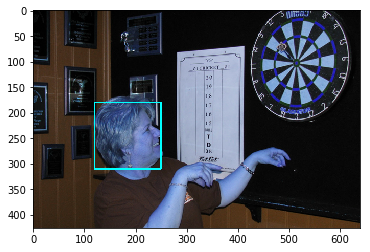

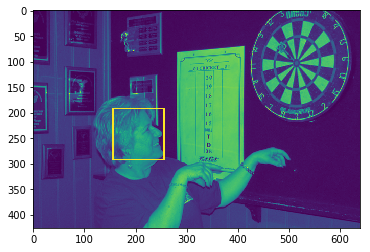

----------------------------------------
1


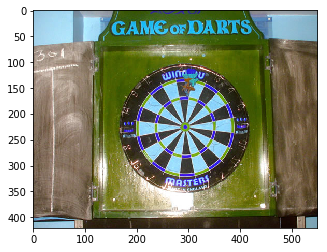

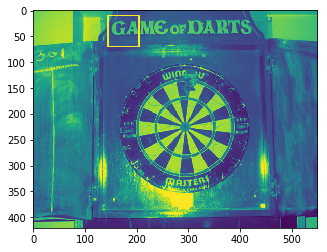

----------------------------------------
2


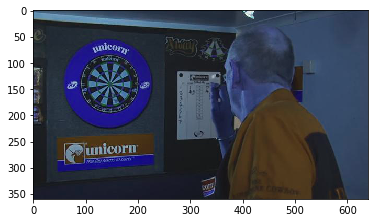

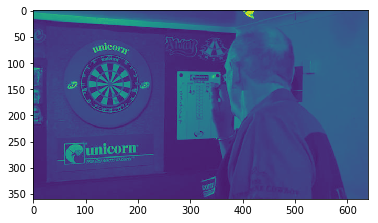

----------------------------------------
3


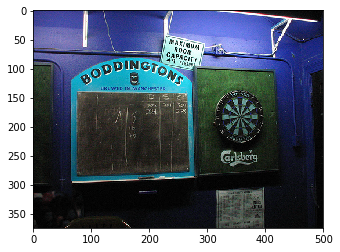

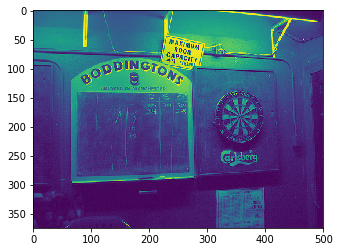

----------------------------------------
4


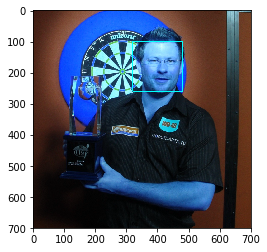

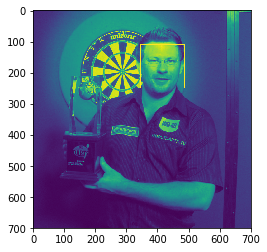

----------------------------------------
5


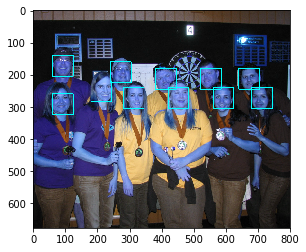

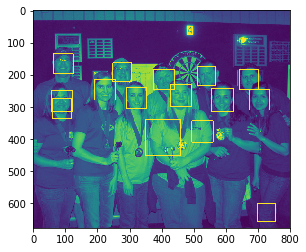

----------------------------------------
6


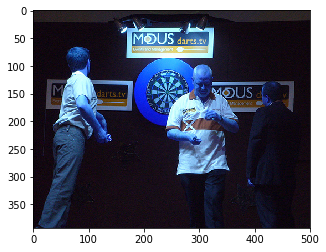

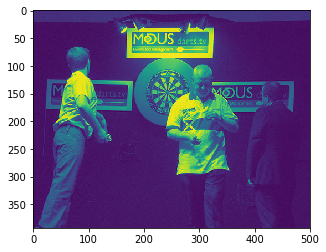

----------------------------------------
7


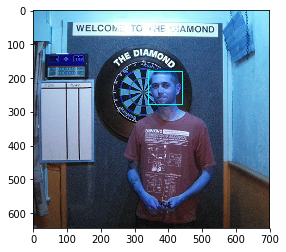

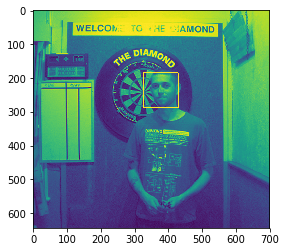

----------------------------------------
8


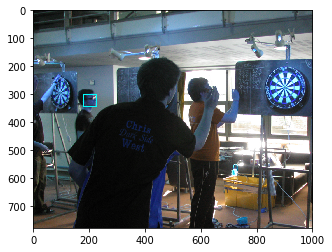

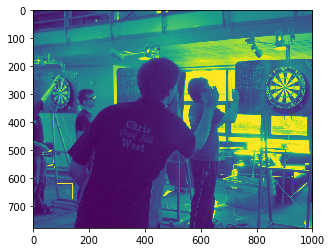

----------------------------------------
9


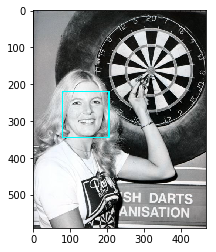

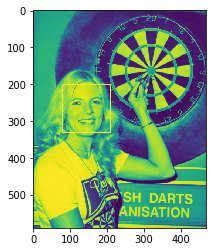

----------------------------------------
10


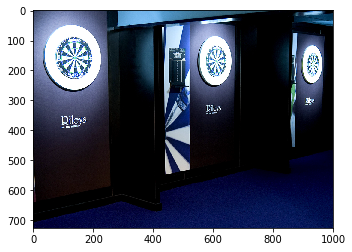

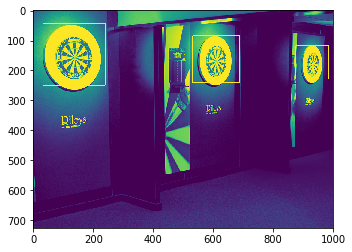

----------------------------------------
11


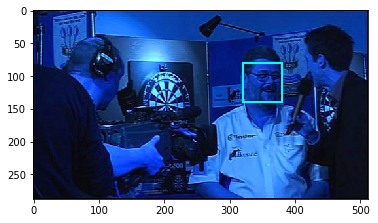

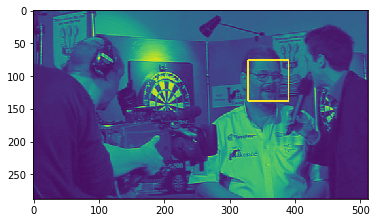

----------------------------------------
12


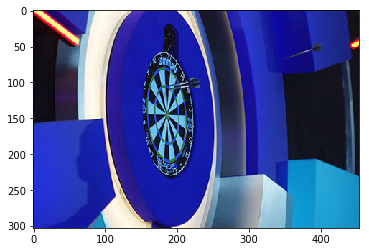

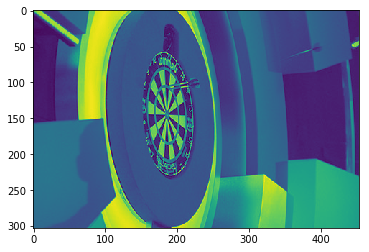

----------------------------------------
13


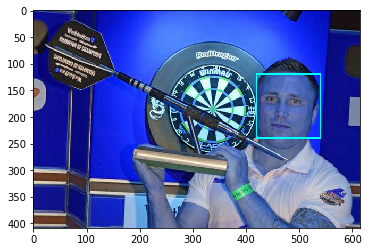

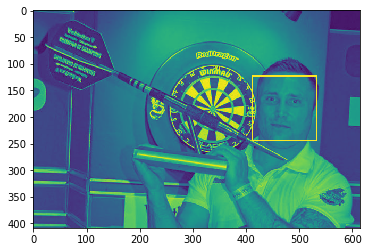

----------------------------------------
14


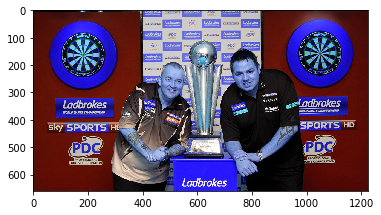

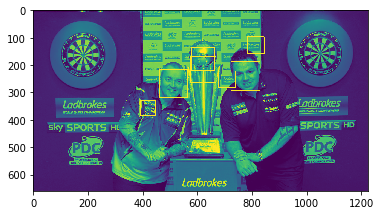

----------------------------------------
15


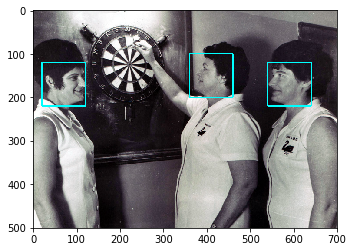

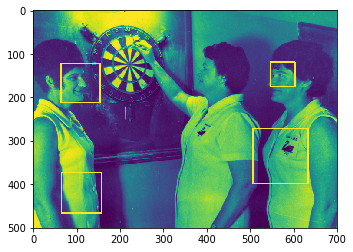

In [31]:
realFaceSquares = loadSquares()

for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(imageDictionary["image"][i])
    for x, y, a in realFaceSquares[str(i)]:
        cv.rectangle(c, (x, y), (x + a, y+a), (0, 255, 255), 2)
    imageDictionary["realFaces"].append(c)
    print("----------------------------------------")
    print(i)
    plt.imshow(c)
    plt.show()
    plt.imshow(imageDictionary["faceDetectedImage"][i])
    plt.show()
    

In [30]:
for i in range(len(realFaceSquares.keys())):
    numberOfFacesInImage = len(realFaceSquares[str(i)])
    facesDetected = len(detectedFaceSquare[str(i)])
    truePositives = 0
    falsePositives = 0
    for m in range(len(realFaceSquares[str(i)])):
        x, y, z = realFaceSquares[str(i)][m]
        for n in range(len(detectedFaceSquare[str(i)])):
            a, b, c = detectedFaceSquare[str(i)][n]
            if abs(a - x) < 50 and abs(b-y) < 50:
                truePositives += 1
                break
    falsePositives = facesDetected - truePositives
    print(i, numberOfFacesInImage, facesDetected, truePositives, falsePositives)
        
                
        

0 1 1 1 0
1 0 1 0 1
2 0 0 0 0
3 0 0 0 0
4 1 1 1 0
5 11 15 11 4
6 0 0 0 0
7 1 1 1 0
8 1 1 0 1
9 1 1 1 0
10 0 3 0 3
11 1 1 1 0
12 0 0 0 0
13 1 1 1 0
14 0 7 0 7
15 3 4 2 2
